This notebook was written by Brittaney Everitt 10211957


Load in the training data


In [ ]:
import pandas as pd

#load in the training csv file 
yTrain = pd.read_csv('/Users/brittaneyeveritt/Documents/GitHub/Deep-Learning-Project/trainingPatchLabelsOrdered.csv') #stores the label column in a 2D data frame, with axis labelled 'label'

print(yTrain)
print(yTrain['Name'][0])

#one hot encode the training labels so that it can be used in the weight update calculation
y = pd.get_dummies(yTrain.Label, prefix='label')

y_train = y.to_numpy()
print(y_train)


                                                     Name  Label
0       /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
1       /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
2       /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
3       /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
4       /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
...                                                   ...    ...
335335  /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
335336  /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
335337  /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
335338  /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
335339  /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1

[335340 rows x 2 columns]
/Users/brittaneyeveritt/Documents/GitHub/Deep-Learning-Project/TrainingPatchesOrdered/train_patch_01_0000.png
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [ ]:
from PIL import Image
import os
import numpy as np

#this function loads in all of images from a folder
def load_data(folder):
    images = [] #instantiate an empty array to store all image data 
    count = 0

    #loop through every image in the folder/ directory 
    for file in os.listdir(folder):

      file_id = file.replace('.png', '') #removes the .png ending of the image file and replaces it with an empty string of size 0 characters

      #open the current image file and convert it to an array 
      image = Image.open( 
        os.path.join(folder, file) #concatentaes folder path name and individual image file name, returns a string which represents the concatenated path of current image file in the loop
      ).resize((75, 75)) #resize the images to 75x75 pixels 

      arr = np.array(image) #converts the Image object to a NumPy array, the values of each pixel are stored in the array 
      images.append((file_id, arr)) #append tupule with image id and array of image pixels to array of all images

      count+=1
      print(count)
    
    images.sort(key=lambda i: i[0]) #sort the images in the array based on their file_id
    return images

allImagesID = load_data('/Users/brittaneyeveritt/Documents/GitHub/Deep-Learning-Project/TrainingPatchesOrdered')


Streaming output truncated to the last 5000 lines.
330341
330342
330343
330344
330345
330346
330347
330348
330349
330350
330351
330352
330353
330354
330355
330356
330357
330358
330359
330360
330361
330362
330363
330364
330365
330366
330367
330368
330369
330370
330371
330372
330373
330374
330375
330376
330377
330378
330379
330380
330381
330382
330383
330384
330385
330386
330387
330388
330389
330390
330391
330392
330393
330394
330395
330396
330397
330398
330399
330400
330401
330402
330403
330404
330405
330406
330407
330408
330409
330410
330411
330412
330413
330414
330415
330416
330417
330418
330419
330420
330421
330422
330423
330424
330425
330426
330427
330428
330429
330430
330431
330432
330433
330434
330435
330436
330437
330438
330439
330440
330441
330442
330443
330444
330445
330446
330447
330448
330449
330450
330451
330452
330453
330454
330455
330456
330457
330458
330459
330460
330461
330462
330463
330464
330465
330466
330467
330468
330469
330470
330471
330472
330473
330474
330475
3304

In [ ]:
#remove the file_id from the tuple 
#save all of the image arrays in one numpy array 
allImages = np.array([v for _id, v in allImagesID])

In [ ]:
#visualize an image to make sure images are correctly loaded into the array  
new_im = Image.fromarray(allImages[0])
new_im.show()


Load in Testing Data


In [ ]:
import pandas as pd

#load in the testing csv file 
yTest = pd.read_csv('/Users/brittaneyeveritt/Documents/GitHub/Deep-Learning-Project/testingPatchLabelsOrdered.csv') #stores the label column in a 2D data frame, with axis labelled 'label'
print(yTest)

#one hot encode the testing labels so that it can be used in the weight update calculation
y = pd.get_dummies(yTest.Label, prefix='label')

y_test = y.to_numpy()
print(y_test)

                                                     Name  Label
0       /Users/brittaneyeveritt/Documents/GitHub/Deep-...      1
1       /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
2       /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
3       /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
4       /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
...                                                   ...    ...
116635  /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
116636  /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
116637  /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
116638  /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1
116639  /Users/brittaneyeveritt/Documents/GitHub/Deep-...     -1

[116640 rows x 2 columns]
[[0 1]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [ ]:
from PIL import Image
import os
import numpy as np
#loads in the testing images 
def load_data(folder):
    images = [] #instantiate an empty array to store all image data 
    count = 0
    
    #loop through every image in the folder/ directory 
    for file in os.listdir(folder):
      file_id = file.replace('.png', '') #removes the .png ending of the image file and replaces it with an empty string of size 0 characters

      #open the current image file and convert it to an array 
      image = Image.open( 
        os.path.join(folder, file) #concatentaes folder path name and individual image file name, returns a string which represents the concatenated path of current image file in the loop
      ).resize((75, 75))

      arr = np.array(image) #converts the Image object to a NumPy array, the values of each pixel are stored in the array 
      images.append((file_id, arr)) #append tuple with image id and array of image pixels to array of all images

      count+=1
      print(count)
    
    images.sort(key=lambda i: i[0]) #sort the images in the array based on their file_id
    return images

allTestingImages = load_data('/Users/brittaneyeveritt/Documents/GitHub/Deep-Learning-Project/TestPatchesOrdered')

Streaming output truncated to the last 5000 lines.
111641
111642
111643
111644
111645
111646
111647
111648
111649
111650
111651
111652
111653
111654
111655
111656
111657
111658
111659
111660
111661
111662
111663
111664
111665
111666
111667
111668
111669
111670
111671
111672
111673
111674
111675
111676
111677
111678
111679
111680
111681
111682
111683
111684
111685
111686
111687
111688
111689
111690
111691
111692
111693
111694
111695
111696
111697
111698
111699
111700
111701
111702
111703
111704
111705
111706
111707
111708
111709
111710
111711
111712
111713
111714
111715
111716
111717
111718
111719
111720
111721
111722
111723
111724
111725
111726
111727
111728
111729
111730
111731
111732
111733
111734
111735
111736
111737
111738
111739
111740
111741
111742
111743
111744
111745
111746
111747
111748
111749
111750
111751
111752
111753
111754
111755
111756
111757
111758
111759
111760
111761
111762
111763
111764
111765
111766
111767
111768
111769
111770
111771
111772
111773
111774
111775
1117

In [ ]:
#remove the file_id from the tuple 
#save all of the image arrays in one numpy array 
allTestImages = np.array([v for _id, v in allTestingImages])

In [ ]:
#visualize a testing image
print(allTestImages[0])
new_im = Image.fromarray(allTestImages[0])
new_im.show()

[[157 156 161 ... 153 150 145]
 [158 158 160 ... 154 154 148]
 [159 154 155 ... 155 152 150]
 ...
 [158 157 155 ... 183 183 176]
 [158 155 151 ... 179 180 176]
 [158 154 154 ... 179 178 172]]


Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input #Keras in deep learning library built on top of TensorFlow 

#The model
#The layers are arranged in "sequential" order
def build():
    #the shape of the expected input is the size of the image, 1 channel because the images are grayscale
    img_in = Input(shape=(75,75,1)) #instantiates a Keras tensor, the input node 
    
    #first convolution layer with 32 filters, kernel size of 3, stides of 1, with no padding and a relu activation function
    c1 = tf.keras.layers.Conv2D(32, (3,3), strides = (1,1), padding='valid',activation='relu')(img_in)

    #first max pooling layer with a pool size of 2x2, strides of 2, and no padding 
    p1 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides=2, padding = 'valid')(c1)

    #second convolution layer with 64 filters, kernel size of 3, stides of 1, with no padding and a relu activation function
    c2 = tf.keras.layers.Conv2D(64, (3,3), strides = (1,1), padding='valid',activation='relu')(p1)

    #second max pooling layer with a pool size of 2x2, strides of 2, and no padding 
    p2 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides=2, padding = 'valid')(c2)

    #Flattens 3D tensor output to 1D in order to be used in the fully connected neural network layers
    flattened = Flatten()(p2) 
    
    #fully connected neural network, 128 output nodes, relu activation function 
    fc1 = Dense(128,activation='relu')(flattened) 

    #fully connected neural network, 64 output nodes, relu activation function
    fc2 = Dense(64,activation='relu')(fc1)

    #Output layer with 2 ouput nodes because there are 2 classes, with a softmax activation 
    output = Dense(2, activation = 'softmax')(fc2) 

    model = tf.keras.Model(inputs=img_in, outputs=output) #create Model using input tensor and output layer 
    return model


model = build() #build the CNN

#can load saved model weights
#model.load_weights("weightsApr14.best.hdf5")

#compile the model 
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #adam optimizer
        loss='categorical_crossentropy', #categorical cross entropy loss function
        metrics=['categorical_accuracy'] #categorical accuracy metric for evaulating the model
        )

#displays a summary of the CNN
#shows the layer and its type, the output shape, and the number of parameters at each layer  
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 75, 75, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 73, 73, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2367

In [ ]:
from keras.callbacks import ModelCheckpoint

#add a checkpoint to save the model weights 
#save the model weights when the categorical accuracy improves during that epoch 
filepath="weightsApr14.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
#This code sets up how to train the model
epochs = 35 #35 epochs
batch_size = 128 #batch size of 128

#Train the model on the training data, using epoch and batch size 
history = model.fit(x = allImages, #training data
                    y = y_train, #labels
                    batch_size = batch_size,
                    epochs=epochs,
                    #callbacks = callbacks_list #can add callbacks if needed to load in the saved model weights from a checkpoint
                    )

Epoch 1/35
2620/2620 [==============================] - 694s 265ms/step - loss: 0.0223 - categorical_accuracy: 0.9910

Epoch 00001: categorical_accuracy improved from 0.99066 to 0.99101, saving model to weightsApr14.best.hdf5
Epoch 2/35
2620/2620 [==============================] - 691s 264ms/step - loss: 0.0223 - categorical_accuracy: 0.9911

Epoch 00002: categorical_accuracy improved from 0.99101 to 0.99109, saving model to weightsApr14.best.hdf5
Epoch 3/35
2620/2620 [==============================] - 655s 250ms/step - loss: 0.0219 - categorical_accuracy: 0.9912

Epoch 00003: categorical_accuracy improved from 0.99109 to 0.99122, saving model to weightsApr14.best.hdf5
Epoch 4/35
2620/2620 [==============================] - 654s 249ms/step - loss: 0.0217 - categorical_accuracy: 0.9912

Epoch 00004: categorical_accuracy improved from 0.99122 to 0.99125, saving model to weightsApr14.best.hdf5
Epoch 5/35
2620/2620 [==============================] - 688s 262ms/step - loss: 0.0212 - categor

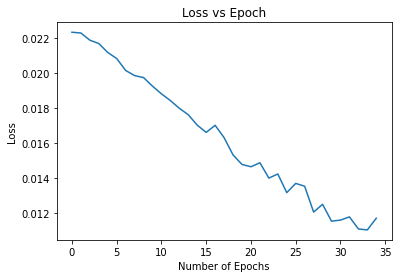

In [ ]:
#display loss, no validation data only training data
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

Analyze the results from training 


In [ ]:
#run the training data through the trained model 
train_pred = model.predict(allImages)

print(train_pred)

In [ ]:
#get the predicted labels of the data 
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

#calculate predicted label 
yTrain_predLabel = np.argmax(train_pred,axis = 1) 

#change the encoded, predicted label to match the actual label
for i in range(len(yTrain_predLabel)):
  if yTrain_predLabel[i] == 0:
    yTrain_predLabel[i] = -1

#retrieve actual training labels in a numpy array 
yTrainLabels = pd.read_csv('/Users/brittaneyeveritt/Documents/GitHub/Deep-Learning-Project/trainingPatchLabelsOrdered.csv')['Label']
yTrainArray = np.array(yTrainLabels)

#display the classification report of the training data results
print(classification_report(yTrainArray,yTrain_predLabel))

#display precision, recall, and F1-score 
print("Overall precision",round(precision_score(yTrainArray,yTrain_predLabel, average='macro'),2))
print("Overall recall",round(recall_score(yTrainArray,yTrain_predLabel, average='macro'),2))
print("Overall f1 score",round(f1_score(yTrainArray,yTrain_predLabel, average="macro"),2))


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    329434
           1       0.91      0.89      0.90      5906

    accuracy                           1.00    335340
   macro avg       0.95      0.95      0.95    335340
weighted avg       1.00      1.00      1.00    335340

Overall precision 0.95
Overall recall 0.95
Overall f1 score 0.95


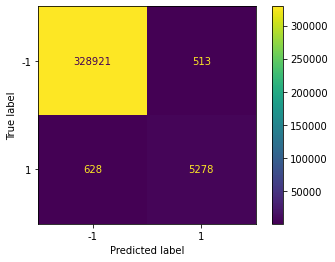

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#display the classification matrix of the trianing data results 

classes = ['-1','1']

confusion = confusion_matrix(yTrainArray,yTrain_predLabel)
training_mat = ConfusionMatrixDisplay(confusion,display_labels = classes)
training_mat.plot()

Analyze and run the test data

In [ ]:
#This code runs the testing data through the trained model
yTest_pred = model.predict(allTestImages)

In [ ]:
#calculate predicted label 
yTest_predLabel = np.argmax(yTest_pred,axis = 1) 

#change the encoded, predicted label to match the actual label
for i in range(len(yTest_predLabel)):
  if yTest_predLabel[i] == 0:
    yTest_predLabel[i] = -1

#retrieve the actual testing labels 
yTestLabels = pd.read_csv('/Users/brittaneyeveritt/Documents/GitHub/Deep-Learning-Project/testingPatchLabelsOrdered.csv')['Label']
yTestArray = np.array(yTestLabels)

#display classification report of the testing data results
print(classification_report(yTestArray,yTest_predLabel))

#export predicted labels 
y_test_df = pd.DataFrame() #create dataframe
y_test_df['patchNum'] = np.arange(len(yTest_predLabel)) #create id column
y_test_df['label'] = yTest_predLabel #create column of all predicted labels of the testing data 
y_test_df.to_csv('PredictionTestLabels.csv', index=False) #save dataFrame as csv file

#display precision, recall, and F1-score 
print("Overall precision",round(precision_score(yTestArray,yTest_predLabel, average='macro'),2))
print("Overall recall",round(recall_score(yTestArray,yTest_predLabel, average='macro'),2))
print("Overall f1 score",round(f1_score(yTestArray,yTest_predLabel, average="macro"),2))



              precision    recall  f1-score   support

          -1       0.99      1.00      0.99    114504
           1       0.72      0.67      0.69      2136

    accuracy                           0.99    116640
   macro avg       0.86      0.83      0.84    116640
weighted avg       0.99      0.99      0.99    116640

Overall precision 0.86
Overall recall 0.83
Overall f1 score 0.84


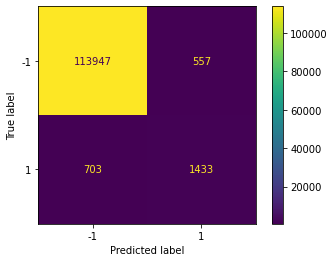

In [ ]:
#display the classification matrix of the testing data results 

classes = ['-1','1']

confusion = confusion_matrix(yTestArray,yTest_predLabel)
training_mat = ConfusionMatrixDisplay(confusion,display_labels = classes)
training_mat.plot()